In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_parquet('data/train_data.pqt')
train = train.convert_dtypes()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 93 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       600000 non-null  Int64  
 1   date                     600000 non-null  string 
 2   balance_amt_avg          534423 non-null  Float64
 3   balance_amt_max          534423 non-null  Float64
 4   balance_amt_min          534423 non-null  Float64
 5   balance_amt_day_avg      534423 non-null  Float64
 6   channel_code             557150 non-null  string 
 7   city                     521656 non-null  string 
 8   city_type                521656 non-null  string 
 9   index_city_code          274776 non-null  string 
 10  ogrn_days_end_month      568527 non-null  Float64
 11  ogrn_days_end_quarter    568527 non-null  Float64
 12  ogrn_month               568527 non-null  string 
 13  ogrn_year                568527 non-null  string 
 14  ft_r

In [3]:
train.describe()

,id,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,ogrn_days_end_month,ogrn_days_end_quarter,ft_registration_date,max_founderpres,min_founderpres,...,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m
count,600000.0,534423.0,534423.0,534423.0,534423.0,568527.0,568527.0,568640.0,264408.0,264408.0,...,434748.0,600000.0,434748.0,434748.0,600000.0,434748.0,434748.0,600000.0,434748.0,434748.0
mean,99999.5,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,0.810852,0.0,0.946172,0.41092,0.0,0.551292,0.507565,0.0,0.255424,0.456226
std,57735.075031,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000002,1.000002,...,0.145072,1.000001,0.011519,0.080259,1.000001,0.014255,0.156156,1.000001,0.01732,0.136101
min,0.0,-0.156778,-0.204962,-0.125995,-0.156315,-1.649833,-1.722458,-1.081749,-1.149405,-1.075208,...,0.728507,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201132,0.250924,0.37454
25%,49999.75,-0.156093,-0.204276,-0.125912,-0.155653,-0.836937,-0.870685,-0.756218,-0.760881,-0.766869,...,0.728507,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.37454
50%,99999.5,-0.149948,-0.19031,-0.12487,-0.149586,-0.024041,-0.018912,-0.31512,-0.276488,-0.296553,...,0.750485,-0.028584,0.944497,0.384773,-0.165588,0.547176,0.429909,-0.201123,0.251501,0.396518
75%,149999.25,-0.103378,-0.106326,-0.11248,-0.10332,0.788855,0.871577,0.404024,0.451993,0.455432,...,0.816419,-0.028584,0.944889,0.396267,-0.143618,0.549755,0.54102,-0.138444,0.254101,0.473441
max,199999.0,154.240651,117.495722,91.450771,154.719284,1.834007,1.800784,3.032875,3.376642,3.592823,...,1.728507,365.960327,1.944497,1.384773,247.459963,1.546889,1.407687,107.581823,1.250924,1.37454


In [4]:
train.city.value_counts()

city
city_0       86234
city_14      39358
city_21      16398
city_6       15358
city_22      11674
             ...  
city_5275        1
city_8870        1
city_8441        1
city_8799        1
city_8841        1
Name: count, Length: 8917, dtype: Int64

In [5]:
train.segment.value_counts()

segment
segment_3    341965
segment_0     91940
segment_2     80996
segment_1     54948
Name: count, dtype: Int64

In [6]:
train.start_cluster.value_counts()

start_cluster
{α}          375947
{}            78803
{α, η}        43824
{α, γ}        32790
{other}       31813
{α, β}         9869
{α, δ}         8537
{α, ε}         5843
{α, θ}         4968
{α, ψ}         3000
{α, μ}         1341
{α, ε, η}      1207
{α, ε, θ}       851
{α, λ}          739
{α, ε, ψ}       374
{λ}              69
{α, π}           25
Name: count, dtype: Int64

In [7]:
# Процент оставшихся клиентов по кластеру, в среднем
(train.end_cluster.value_counts() / train.start_cluster.value_counts()).sort_values(ascending=False)

{λ}          2.028986
{α, μ}       1.583147
{}           1.552809
{other}      1.483576
{α, ε, η}     1.38691
{α, ε, θ}    1.321974
{α, θ}       1.310588
{α, λ}       1.181326
{α, β}       1.135171
{α, γ}       1.051266
{α, ψ}       0.976333
{α, ε, ψ}    0.965241
{α, ε}        0.93274
{α, η}       0.931225
{α}          0.847646
{α, π}           0.76
{α, δ}       0.477685
Name: count, dtype: Float64

<Axes: xlabel='end_cluster', ylabel='start_cluster'>

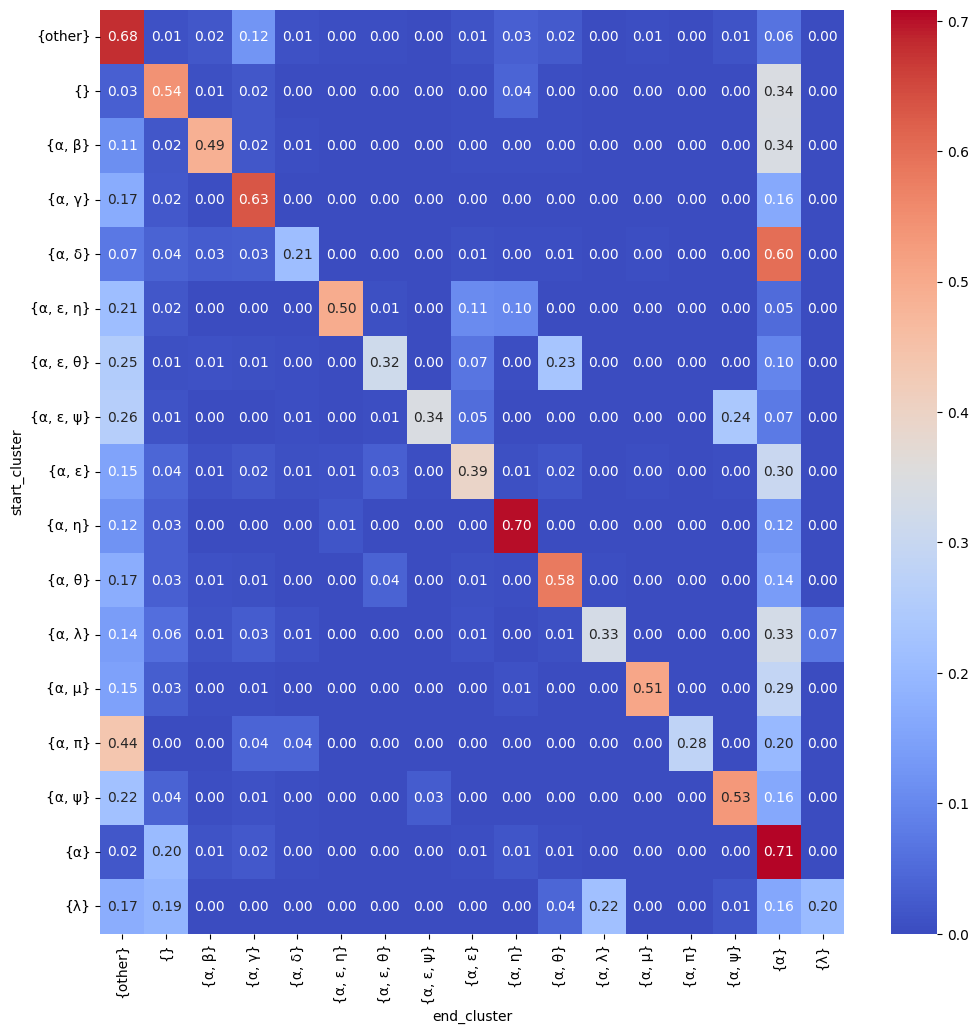

In [8]:
# Тепловая карта переходовб нормализованная по строкам
cross = pd.crosstab(train.start_cluster, train.end_cluster, normalize='index')
plt.figure(figsize=(12, 12))
sns.heatmap(cross, cmap='coolwarm', annot=True, fmt='.2f')

In [9]:
clusters = cross.index.values.tolist()
clusters

['{other}',
 '{}',
 '{α, β}',
 '{α, γ}',
 '{α, δ}',
 '{α, ε, η}',
 '{α, ε, θ}',
 '{α, ε, ψ}',
 '{α, ε}',
 '{α, η}',
 '{α, θ}',
 '{α, λ}',
 '{α, μ}',
 '{α, π}',
 '{α, ψ}',
 '{α}',
 '{λ}']

In [10]:
from sklearn.metrics import roc_auc_score

def weighted_roc_auc(y_true, y_pred, labels, weights_dict):
    unnorm_weights = np.array([weights_dict[label] for label in labels])
    weights = unnorm_weights / unnorm_weights.sum()
    classes_roc_auc = roc_auc_score(y_true, y_pred, labels=labels,
                                    multi_class="ovr", average=None)
    return sum(weights * classes_roc_auc)

cluster_weights = pd.read_excel("data/cluster_weights.xlsx").set_index("cluster")
weights_dict = cluster_weights["unnorm_weight"].to_dict()

def score(y_true, y_pred):
    return weighted_roc_auc(y_true, y_pred, labels=clusters, weights_dict=weights_dict)

In [11]:
probability_predictions = cross.loc[train.start_cluster].values
y_true = train.end_cluster.values
score(y_true, probability_predictions)

0.8137253568976719

In [12]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=42, shuffle=False)

cross_train = pd.crosstab(train.start_cluster, train.end_cluster, normalize='index')
val_pred = cross_train.loc[val.start_cluster].values
val_true = val.end_cluster.values
score(val_true, val_pred)

0.811467134350189

<Axes: xlabel='end_cluster', ylabel='start_cluster'>

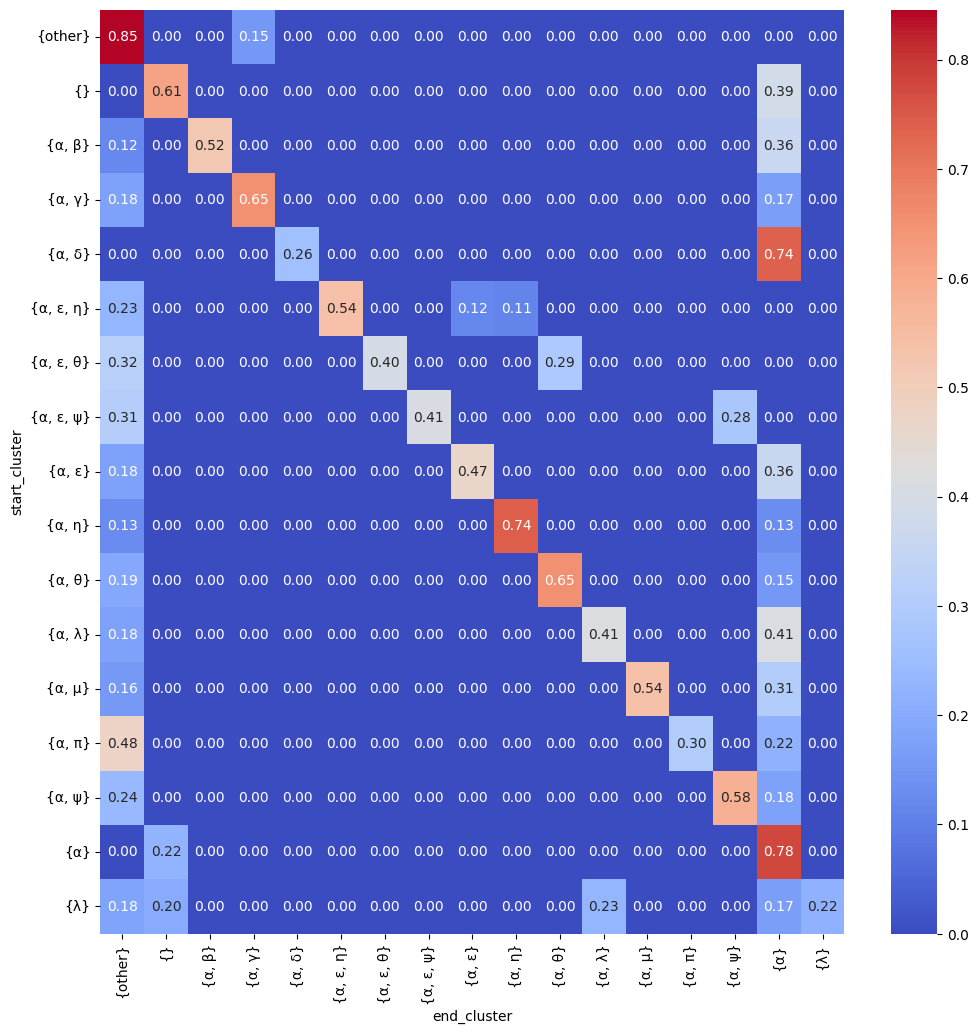

In [13]:
cross_high = cross.copy()
cross_high[cross_high < 0.1] = 0
cross_high = cross_high.div(cross_high.sum(axis=1), axis=0)
plt.figure(figsize=(12, 12))
sns.heatmap(cross_high, cmap='coolwarm', annot=True, fmt='.2f')

In [14]:
greek = {'α': 'alpha', 'β': 'beta', 'γ': 'gamma', 'δ': 'delta', 'ε': 'epsilon', 'η': 'eta', 'θ': 'theta', 'λ': 'lambda', 'μ': 'mu', 'π': 'pi', 'ψ': 'psi'}
greek_rev = {v: k for k, v in greek.items()}

In [15]:
def map_predicted_to_all(predicted, classes):
    result = np.zeros(len(clusters))
    for i, c in enumerate(classes):
        result[clusters.index(c)] = predicted[i]
    return result

def predict(X_test, models):
    defaualt_pred = cross_train.loc[X_test.start_cluster].set_index(X_test.index)
    for start_cluster in X_test.start_cluster.unique():
        if start_cluster in models:
            model = models[start_cluster]
            X = X_test[X_test.start_cluster == start_cluster].select_dtypes(include=np.number).fillna(0)
            pred = model.predict_proba(X)
            pred = np.apply_along_axis(map_predicted_to_all, 1, pred, model.classes_)
            assert pred.shape[0] == X.shape[0] and pred.shape[1] == len(clusters)
            defaualt_pred.loc[X.index] = pred

    return defaualt_pred.values

def score_models(X_val, y_val, models):
    y_pred = predict(X_val, models)
    return score(y_val, y_pred)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

models = {}
for start_cluster in tqdm(clusters):
    X = train[train.start_cluster == start_cluster].select_dtypes(include=np.number).fillna(0)
    y = train[train.start_cluster == start_cluster].end_cluster

    X_val = val[val.start_cluster == start_cluster].select_dtypes(include=np.number).fillna(0)
    y_val = val[val.start_cluster == start_cluster].end_cluster

    cur_clusters = set(y_val.unique()) & set(y.unique())
    if len(cur_clusters) < 2:
        continue

    X = X.loc[y.isin(cur_clusters)]
    y = y.loc[y.isin(cur_clusters)]
    X_val = X_val.loc[y_val.isin(cur_clusters)]
    y_val = y_val.loc[y_val.isin(cur_clusters)]

    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=5)
    # model = LGBMClassifier(n_jobs=-1, verbose=100, max_depth=5, n_estimators=100, random_state=42)
    model.fit(X, y)
    models[start_cluster] = model

    val_pred = model.predict_proba(X_val)

    try:
        print(start_cluster, roc_auc_score(y_val, val_pred, multi_class="ovr", labels=model.classes_))
    except ValueError:
        print(start_cluster, "Unkown AUC")

score_all = score_models(val, val.end_cluster, models)
score_all

  6%|▌         | 1/17 [00:02<00:46,  2.94s/it]

{other} 0.7515146661984261


 12%|█▏        | 2/17 [00:05<00:40,  2.72s/it]

{} 0.7320333200364864


 18%|█▊        | 3/17 [00:06<00:27,  1.96s/it]

{α, β} 0.663532453894492


 24%|██▎       | 4/17 [00:09<00:28,  2.16s/it]

{α, γ} 0.6610562505304637


 29%|██▉       | 5/17 [00:09<00:20,  1.68s/it]

{α, δ} 0.7138994249904337


 35%|███▌      | 6/17 [00:10<00:14,  1.30s/it]

{α, ε, η} 0.5626839892719414


 41%|████      | 7/17 [00:10<00:10,  1.02s/it]

{α, ε, θ} 0.6603259120455995


 47%|████▋     | 8/17 [00:11<00:07,  1.18it/s]

{α, ε, ψ} 0.6493968709538885


 53%|█████▎    | 9/17 [00:12<00:06,  1.25it/s]

{α, ε} 0.6937334374393526


 59%|█████▉    | 10/17 [00:15<00:11,  1.63s/it]

{α, η} 0.7017353126607021


 65%|██████▍   | 11/17 [00:16<00:07,  1.32s/it]

{α, θ} 0.6442388902715639


 71%|███████   | 12/17 [00:16<00:05,  1.09s/it]

{α, λ} 0.6014209486251674


 76%|███████▋  | 13/17 [00:17<00:03,  1.13it/s]

{α, μ} 0.7175788656690036


 82%|████████▏ | 14/17 [00:17<00:02,  1.42it/s]

{α, π} Unkown AUC


 88%|████████▊ | 15/17 [00:17<00:01,  1.58it/s]

{α, ψ} 0.6182193621823878


 94%|█████████▍| 16/17 [00:48<00:09,  9.57s/it]

{α} 0.745865641556836


100%|██████████| 17/17 [00:48<00:00,  2.86s/it]

{λ} 0.7511904761904762


0.8856302687752039

In [17]:
best_models = {}

best_score = score_models(val, val.end_cluster.values, best_models)
print(f"Initial best score: {best_score:.4f}")

for start_cluster in clusters:
    if start_cluster not in models:
        continue

    best_models[start_cluster] = models[start_cluster]
    cur_score = score_models(val, val.end_cluster.values, best_models)
    if cur_score < best_score:
        del best_models[start_cluster]
    else:
        best_score = cur_score
        print(f'Cluster {start_cluster} added')
        print(f"New best score: {best_score:.4f}")

best_score, len(best_models)

Initial best score: 0.8115
Cluster {other} added
New best score: 0.8164
Cluster {} added
New best score: 0.8245
Cluster {α, β} added
New best score: 0.8251
Cluster {α, γ} added
New best score: 0.8265
Cluster {α, δ} added
New best score: 0.8276
Cluster {α, ε, η} added
New best score: 0.8276
Cluster {α, ε, θ} added
New best score: 0.8276
Cluster {α, ε, ψ} added
New best score: 0.8276
Cluster {α, ε} added
New best score: 0.8286
Cluster {α, η} added
New best score: 0.8291
Cluster {α, θ} added
New best score: 0.8294
Cluster {α, λ} added
New best score: 0.8295
Cluster {α, μ} added
New best score: 0.8295
Cluster {α, π} added
New best score: 0.8295
Cluster {α, ψ} added
New best score: 0.8298
Cluster {α} added
New best score: 0.8856
Cluster {λ} added
New best score: 0.8856


(0.8856302687752039, 17)

In [18]:
test = pd.read_parquet('data/test_data.pqt')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290120 entries, 0 to 290119
Data columns (total 92 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       290120 non-null  int64  
 1   date                     290120 non-null  object 
 2   balance_amt_avg          260637 non-null  float64
 3   balance_amt_max          260637 non-null  float64
 4   balance_amt_min          260637 non-null  float64
 5   balance_amt_day_avg      260637 non-null  float64
 6   channel_code             270092 non-null  object 
 7   city                     229508 non-null  object 
 8   city_type                229128 non-null  object 
 9   index_city_code          133659 non-null  object 
 10  ogrn_days_end_month      275842 non-null  float64
 11  ogrn_days_end_quarter    275842 non-null  float64
 12  ogrn_month               275842 non-null  object 
 13  ogrn_year                275842 non-null  object 
 14  ft_r

In [19]:
test.start_cluster.info()

<class 'pandas.core.series.Series'>
RangeIndex: 290120 entries, 0 to 290119
Series name: start_cluster
Non-Null Count   Dtype 
--------------   ----- 
190120 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [20]:
test.head(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.096224,0.335496,-0.125995,-0.095578,channel_code_12,city_14,city_type_0,None,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
1,200000,month_5,-0.024255,-0.059806,-0.124295,-0.023381,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.150505,0.549468,0.552131,0.237817,0.264211,0.715199,{α}
2,200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.152800,0.549468,0.541020,0.387566,0.268543,0.836079,None


In [21]:
sample_submission = pd.read_csv("data/sample_submission.csv")
sample_submission.shape

(100000, 18)

In [22]:
sample_submission.head(3)

,id,{other},{},"{α, β}","{α, γ}","{α, δ}","{α, ε, η}","{α, ε, θ}","{α, ε, ψ}","{α, ε}","{α, η}","{α, θ}","{α, λ}","{α, μ}","{α, π}","{α, ψ}",{α},{λ}
0,200000,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
1,200001,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
2,200002,0.2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [23]:
test.start_cluster = test.start_cluster.ffill()
test_to_predict = test[test.date == 'month_6']
test_to_predict.shape

(100000, 92)

In [24]:
predicted = predict(test_to_predict, best_models)
predicted.shape

(100000, 17)

In [25]:
submission = pd.DataFrame(predicted, columns=clusters)
submission['id'] = test_to_predict.id.values
submission = submission[['id'] + clusters]
submission

,id,{other},{},"{α, β}","{α, γ}","{α, δ}","{α, ε, η}","{α, ε, θ}","{α, ε, ψ}","{α, ε}","{α, η}","{α, θ}","{α, λ}","{α, μ}","{α, π}","{α, ψ}",{α},{λ}
0,200000,0.019918,0.045462,0.021651,0.031180,0.007933,0.000330,0.001097,0.000250,0.009140,0.011233,0.008301,0.002192,0.003885,0.000012,0.002194,0.835195,0.000026
1,200001,0.017410,0.496086,0.002616,0.004215,0.001158,0.000473,0.000350,0.000044,0.001601,0.013211,0.001523,0.000631,0.000813,0.000016,0.000580,0.459176,0.000098
2,200002,0.746530,0.001837,0.013006,0.118322,0.008160,0.002030,0.006366,0.003861,0.015728,0.011472,0.014325,0.001267,0.004013,0.000000,0.010654,0.042429,0.000000
3,200003,0.017357,0.577503,0.002090,0.004279,0.000892,0.000389,0.000377,0.000056,0.001156,0.013040,0.001974,0.000212,0.000850,0.000025,0.000699,0.379022,0.000080
4,200004,0.051370,0.179812,0.023027,0.033306,0.004094,0.000028,0.003391,0.000000,0.008274,0.060946,0.011485,0.000066,0.009281,0.000000,0.002642,0.612274,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.019744,0.408971,0.002954,0.005311,0.001434,0.000100,0.000582,0.000008,0.001778,0.006674,0.001866,0.000831,0.000668,0.000028,0.000799,0.547919,0.000332
99996,299996,0.017578,0.043753,0.017874,0.027655,0.006200,0.000401,0.000677,0.000154,0.007673,0.012981,0.006109,0.001733,0.004334,0.000008,0.001828,0.851015,0.000029
99997,299997,0.037351,0.055103,0.024576,0.050684,0.012654,0.000351,0.001237,0.000388,0.013434,0.013345,0.008119,0.002917,0.004572,0.000083,0.005871,0.769281,0.000035
99998,299998,0.054577,0.177281,0.021385,0.038497,0.001444,0.000000,0.001839,0.000000,0.004788,0.048207,0.004127,0.000000,0.005052,0.000000,0.006352,0.636451,0.000000
